In [4]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pylab as plt
import numpy as np
import numpy.linalg as ln
import scipy as sp
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#libreria sismica
from seismic_source import SeismicEvent, Source

In [6]:
e = SeismicEvent.evento("../data-sets/2011_apr_10_07_52")

importado!


In [7]:
src = Source.Source(e)

La descomposición en componentes principales de un evento sísmico nos permite separar el impulso de la onda $S$ y la onda $P$

importado!


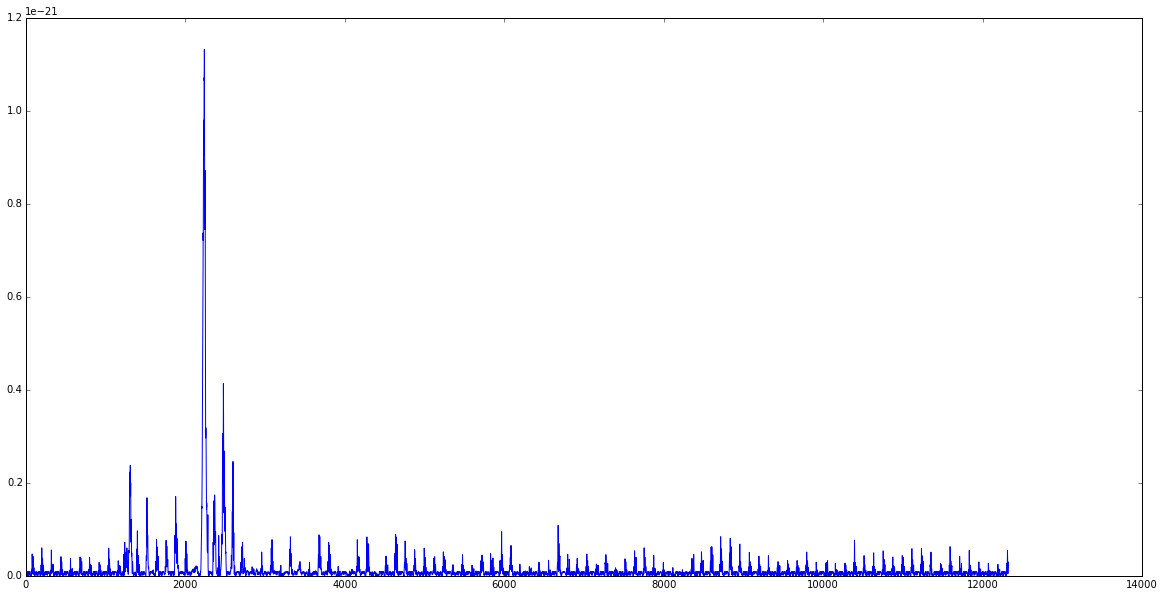

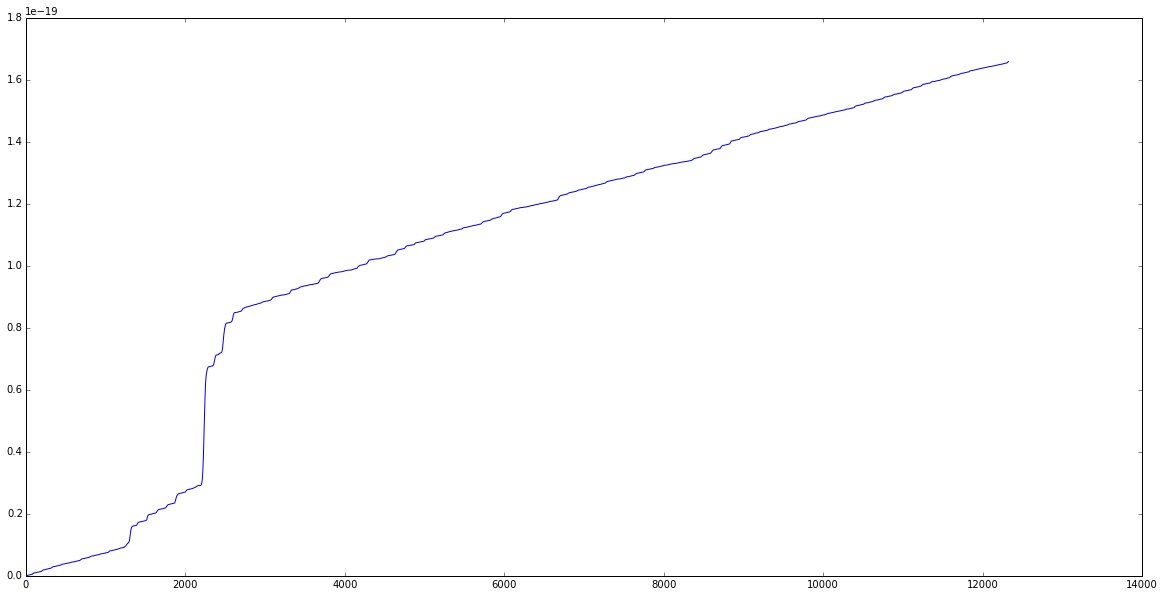

In [8]:
e = SeismicEvent.evento("../data-sets/2011_apr_10_07_52")
ss = e.seismograms[13]
u = np.array([ss.X_coord, ss.Y_coord, ss.Z_coord])

#analisis de componentes principales del sismo para encontrar los mejores candidatos para 
#la estimación del epicentro

pca = PCA()
pca.fit(ss.raw_data**2)
seis_transform = pca.transform(ss.raw_data**2)

plt.figure(figsize=(20,10))
energy = np.cumsum(seis_transform[:,0]**2 + seis_transform[:,1]**2 + seis_transform[:,2]**2)
plt.plot(np.diff(energy))

plt.figure(figsize=(20,10))
plt.plot(energy)

In [10]:
#descomposicion ortgonal
covariance_matrix = cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

NameError: name 'cov' is not defined

In [ ]:
%matplotlib inline


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# Dibujar vectores
e = SeismicEvent.evento("./../data-sets/1998_aug_09_21_49_22.4n3")

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

#estimacion del epicentro
plt.plot([e.LocX], [e.LocY], [e.LocZ], 'o', markersize=10, color='black', alpha=0.5)

for i, ss in enumerate(e.seismograms):

    #descomposicion ortgonal de la señal
    covariance_matrix = ss.data.cov()
    eig_val, eig_vec = ln.eig(covariance_matrix)

    #ubicacion del sensor
    X_coord, Y_coord, Z_coord  = (ss.X_coord, ss.Y_coord, ss.Z_coord)
 
    #graficar las direcciones
    plt.plot([X_coord], [Y_coord], [Z_coord], 'o', markersize=10, color='red', alpha=0.5)
    n = 200
    for v in eig_vec:
    
        a = Arrow3D([X_coord, X_coord + n*v[0]], 
                    [Y_coord, Y_coord + n*v[1]], 
                    [Z_coord, Z_coord + n*v[2]], mutation_scale=10, arrowstyle="-|>")
        ax.add_artist(a)        
    
    ax.set_xlabel('x_values')
    ax.set_ylabel('y_values')
    ax.set_zlabel('z_values')
    plt.draw()
    
plt.title('direcciones')

Estimación individual del epicentro
==
Podemos estimar individualmente el epicentro, buscando el punto que genera el mejor sismo para cada uno de los sismogramas (minimiza el error de estimación). Luego ver si este conjunto de epicentros se agrupan de alguna manera. Para ello necesitamos una condición inicial del epicentro sismico que podemos obtener por el análisis de componentes principales o buscando un decenso de gradiente para **loc_x** , **loc_y** y **loc_z**.

importado!


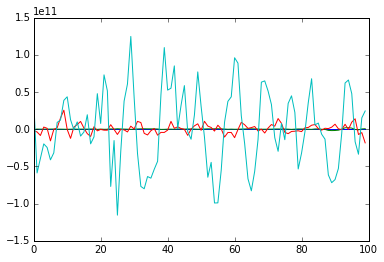

In [11]:
#libreria sismica
from seismic_source import SeismicEvent, Source
e = SeismicEvent.evento("./../data-sets/1998_aug_09_21_49_22.4n3")

src = Source.Source(e)
src, error, rot, vec, val = src.source()
plt.plot(rot)